In [2]:
import tensorflow as tf
print(tf.__version__)
from tensorflow import keras 


2.10.0


In [4]:
mnist = keras.datasets.mnist 
(train_images , train_labels) , (test_images , test_labels) = mnist.load_data()

In [5]:
train_images.shape

(60000, 28, 28)

In [6]:
test_images.shape

(10000, 28, 28)

6


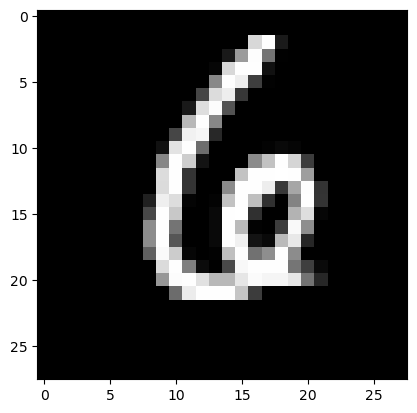

In [7]:
import matplotlib.pyplot as plt 
plt.imshow(test_images[123], cmap = 'gray' )
print(test_labels[123])

In [8]:
train_images , test_images = train_images/255.0 , test_images/255.0

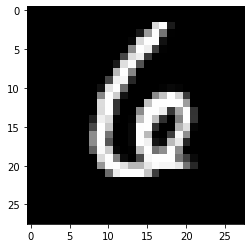

In [13]:
plt.imshow(test_images[123], cmap = 'gray' )

In [10]:
model1 = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(1024, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model1.compile(optimizer = 'adam',loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
history  = model1.fit(train_images, train_labels, epochs= 10)

Epoch 1/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.1831 - accuracy: 0.9457
Epoch 2/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0737 - accuracy: 0.9770
Epoch 3/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0482 - accuracy: 0.9845
Epoch 4/10
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0345 - accuracy: 0.9886
Epoch 5/10
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0261 - accuracy: 0.9914
Epoch 6/10
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0214 - accuracy: 0.9927
Epoch 7/10
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0186 - accuracy: 0.9939
Epoch 8/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0134 - accuracy: 0.9957
Epoch 9/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0163 - accuracy: 0.9948
Epoch 10/10
1875/1875 [==============================] - 13s 7ms/step - l

In [11]:
model1.evaluate(test_images , test_labels)

313/313 [==============================] - 2s 6ms/step - loss: 0.0839 - accuracy: 0.9828


[0.08393516391515732, 0.9828000068664551]

# Model 2 - writing training as an function  with call back 

In [16]:
import tensorflow as tf

mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0


def train_mnist():
    class myCallback(tf.keras.callbacks.Callback):
        def on_epoch_end(self, epoch, logs = {}):
            if(logs.get('accuracy') > 0.99):
                print("\nReached 99% accuracy so cancelling training!")
                self.model.stop_training = True
    callbacks = myCallback()
    model = tf.keras.models.Sequential([
      tf.keras.layers.Flatten(input_shape = (28, 28)),
      tf.keras.layers.Dense(1024, activation = tf.nn.relu),
      tf.keras.layers.Dense(10, activation = tf.nn.softmax)])
    
    model.compile(optimizer = 'adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
    history = model.fit(x_train, y_train, epochs=10, callbacks = [callbacks])
    return model , history 

In [19]:
model2 ,history =  train_mnist()

Epoch 1/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3118 - accuracy: 0.9039 0s - loss: 0.3159 - ac
Epoch 2/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0760 - accuracy: 0.9770
Epoch 3/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0472 - accuracy: 0.9847
Epoch 4/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0353 - accuracy: 0.9877
Epoch 5/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0225 - accuracy: 0.9919

Reached 99% accuracy so cancelling training!


In [20]:
model2.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0716 - accuracy: 0.9796


[0.07159947603940964, 0.9796000123023987]

In [22]:
classifications = model2.predict(x_test)

In [23]:
classifications

array([[4.87544250e-12, 1.70364611e-10, 1.02336783e-09, ...,
        9.99999881e-01, 6.63767760e-13, 1.41231169e-08],
       [5.42816592e-14, 4.14550030e-08, 1.00000000e+00, ...,
        1.02427186e-17, 9.11431833e-11, 1.27098276e-18],
       [3.45575547e-11, 9.99978304e-01, 9.54305051e-07, ...,
        1.49839243e-05, 1.05230151e-06, 7.97642508e-10],
       ...,
       [2.48990761e-16, 6.35644488e-12, 4.72132311e-15, ...,
        2.37420181e-08, 6.81353099e-11, 6.44795819e-07],
       [2.13554380e-13, 3.91220768e-14, 8.02502816e-15, ...,
        2.14486740e-13, 7.34424574e-08, 1.17033255e-14],
       [2.65249017e-10, 1.80865116e-14, 2.36911592e-14, ...,
        9.14847075e-19, 5.71124203e-13, 8.91538972e-14]], dtype=float32)

[5.0203286e-09 6.3483640e-08 3.9613375e-09 2.4026936e-05 1.9656150e-12
 1.1824870e-06 7.5888778e-14 9.9997270e-01 2.3512268e-09 2.0312682e-06]
7


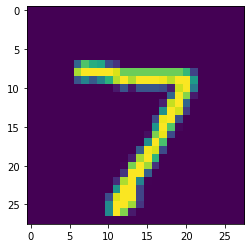

In [9]:
import matplotlib.pyplot as plt 
print(classifications[0])  # It's the probability that this item is each of the 10 classes
print(y_test[0])
plt.imshow(x_test[0])